In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('Icecream.xlsx')
df1

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [3]:
Reg1 = ols(formula = "Sales ~ Student_Population", data=df1)
Fit1 = Reg1.fit()
Fit1.summary()

d:\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.55e-05
Time:                        10:09:39   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 60+5x1; x1 is no. of Studentpopulations

In [5]:
anova_lm(Fit1)
# get anova table for regression analysis
# Residual is 8 bcoz there is a 10 data set. So degree of freedom is n-p-1
# where p is no. of independent variable. There is only one independent 
# variable so the degrees of freedom is 1

# sum_sq/degrees of freedom gives you mean_sq(mean sum of squares)
# F value = mean_sq/mean_error_sum_of_square and p-value is very low so
# model is valid

,df,sum_sq,mean_sq,F,PR(>F)
Student_Population,1.0,14200.0,14200.00,74.248366,0.000025
Residual,8.0,1530.0,191.25,NaN,NaN


In [6]:
# if 95% of data is within limit ie, b/w (-2,2) then it is acceptable and assumption is valid
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external
resid_student
# array of standardized residual

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

# get_influence(): 
get_influence() function calculates how much each data point affects a regression model. It provides metrics like Cook's distance, standardized residuals, studentized residuals and leverage. This helps identify influential points and potential outliers that impact the model's results and predictions.

# resid_studentized_external:
It refers to the externally studentized residuals. Residuals are the differences between the actual observed values and the predicted values from the regression model. Studentized residuals are a type of residual that are standardized, which means they are divided by their estimated standard deviation.
        
"External" studentization involves dividing each residual by an estimate of its standard deviation that is calculated without considering the data point in question. This can help identify data points that have a particularly large influence on the regression model, even if they are not outliers.

High absolute values of studentized residuals suggest that a particular data point might have a significant impact on the overall model fit. These data points are often referred to as "influential points."

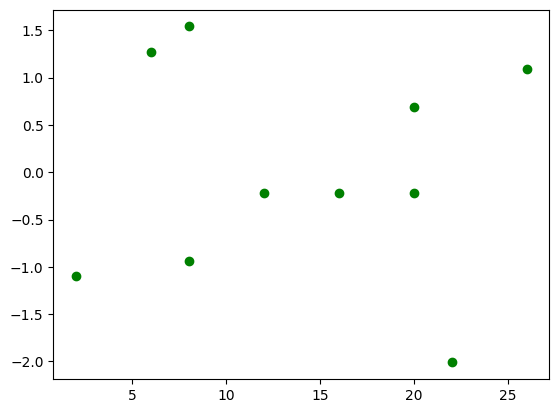

In [7]:
plt.figure()
plt.scatter(df1['Student_Population'],resid_student, color="green")
# plotting standardized residual plot against independent variable x so for 
# that you have to use command 'influence' as done abbove
# if 95% of data is within limit ie, -2 to 2 then it is acceptable and assumption is valid

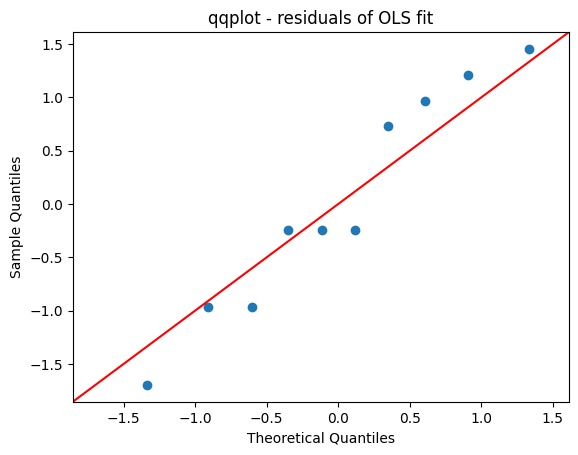

In [12]:
from scipy import stats
import statsmodels.api as sm
res = Fit1.resid #residuals
probplot = sm.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

# In graph, if high majority of points are above red line the normality 
# assumption is validated

Summary: Tested various assumptions about regression models. These assumtions are tested with the help of different residual plots.

4 Types of Residual Plot: Residuals vs Independent variable, Residual vs Our Predicted values, Standardized Residual Plot and Normal Probability Plot.